In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Libreria para estimar regresión
import statsmodels.formula.api as sm

# Libreria para PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
url = "https://raw.githubusercontent.com/xlisouski/DataCoder/main/train.csv"
df = pd.read_csv(url, sep=",")

### SalePrice: 
Es el precio de venta de la casa. Variable target.

### GrLivArea: 
Above grade (ground) living area square feet. Superficie habitable. Variable predictora. 

# Modelo de una sola variable

### Vamos a ajustar el primer modelo de regresión lineal juntos!

**Objetivo:** 
Predecir precio de venta de una casa. 

**Variable dependiente:** 
SalePrice

**Variable independiente:**
GrLivArea

/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Relación entre GrLivArea y SalePrice')

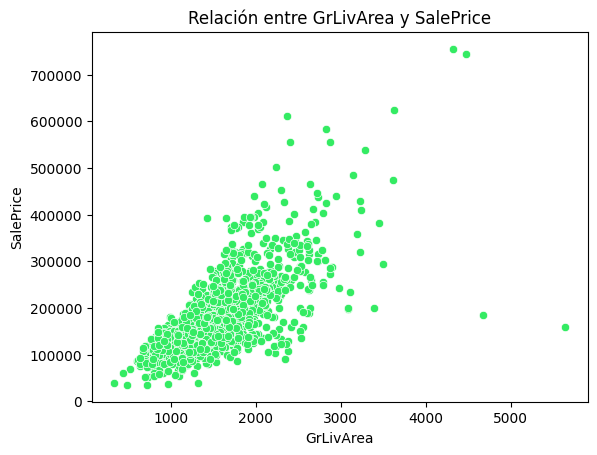

In [3]:
# Visualmente:
plt.figure()
sns.scatterplot(data=df, x="GrLivArea", y="SalePrice", color="#34EB63")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("Relación entre GrLivArea y SalePrice")

En el gráfico se puede observar una cierta relación positiva entre la variable dependiente y la independiente ya que, aparentemente, a mayor GrLivArea, mayor es SalePrice.

In [4]:
# Estimo coeficientes para modelo de regresión lineal con una sola variable:
model1 = "SalePrice ~ GrLivArea"
lm1 = sm.ols(formula=model1, data=df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Wed, 20 Sep 2023   Prob (F-statistic):          4.52e-223
Time:                        21:11:08   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.857e+04   4480.755      4.144      0.0

/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

Text(0.5, 1.0, 'Datos reales vs Estimación')

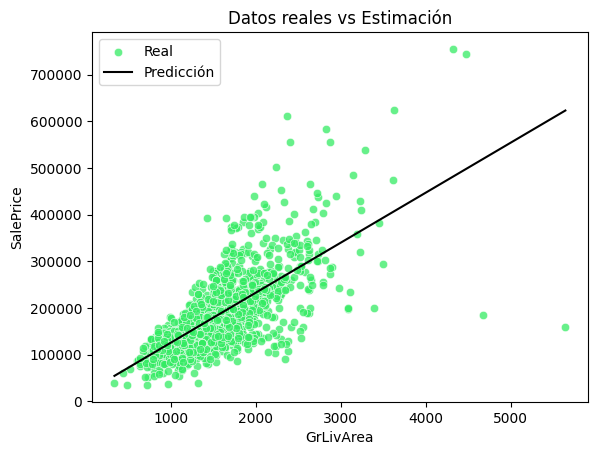

In [5]:
# Graficamente:
df["y_estimado"] = lm1.predict(df)
g1 = plt.figure()
sns.scatterplot(
    data=df, x="GrLivArea", y="SalePrice", label="Real", color="#34EB63", alpha=0.75
)
sns.lineplot(data=df, x="GrLivArea", y="y_estimado", label="Predicción", color="black")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("Datos reales vs Estimación")

In [6]:
coeficientes = lm1.params
print("Coeficientes:")
print(coeficientes)

Coeficientes:
Intercept    18569.025856
GrLivArea      107.130359
dtype: float64


In [7]:
intervalo_confianza = lm1.conf_int()
print("Intervalo de confianza de los coeficientes:")
print(intervalo_confianza)

Intervalo de confianza de los coeficientes:
                     0             1
Intercept  9779.611853  27358.439860
GrLivArea   101.650413    112.610305


In [8]:
pvalores = lm1.pvalues
print("P-Valores:")
print(pvalores.round(6))

P-Valores:
Intercept    0.000036
GrLivArea    0.000000
dtype: float64


In [9]:
r_cuadrado = lm1.rsquared
print("Coeficiente de determinación (R-cuadrado):", r_cuadrado.round(3))

Coeficiente de determinación (R-cuadrado): 0.502


# Modelo con tres variables

### OverallQual: 
Rates the overall material and finish of the house

### GarageArea: 
Size of garage in square feet 

/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Relación entre OverallQual y SalePrice')

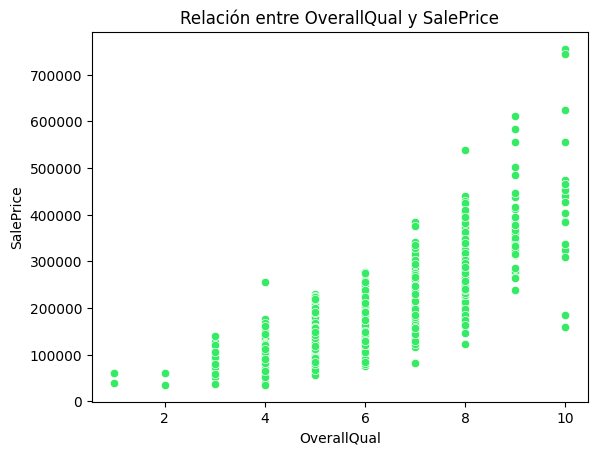

In [10]:
# Visualmente:
plt.figure()
sns.scatterplot(data=df, x="OverallQual", y="SalePrice", color="#34EB63")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.title("Relación entre OverallQual y SalePrice")

/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Relación entre GarageArea y SalePrice')

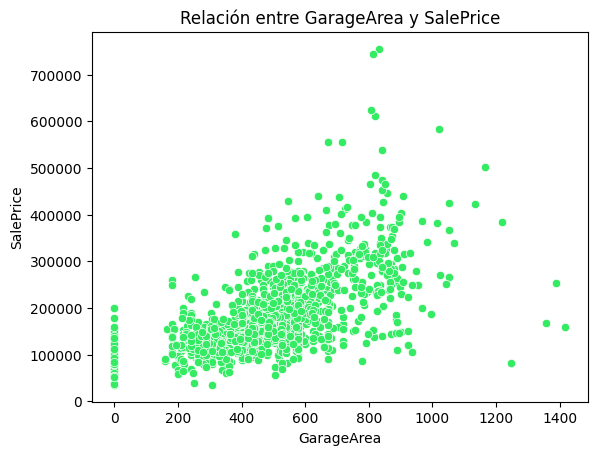

In [11]:
# Visualmente:
plt.figure()
sns.scatterplot(data=df, x="GarageArea", y="SalePrice", color="#34EB63")
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")
plt.title("Relación entre GarageArea y SalePrice")

In [12]:
# Estimo coeficientes para modelo de regresión lineal con una sola variable:
model2 = "SalePrice ~ GrLivArea + OverallQual + GarageArea"
lm2 = sm.ols(formula=model2, data=df).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1377.
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:42:34   Log-Likelihood:                -17562.
No. Observations:                1460   AIC:                         3.513e+04
Df Residuals:                    1456   BIC:                         3.515e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -9.906e+04   4837.368    -20.478      

In [13]:
coeficientes = lm2.params
print("Coeficientes:")
print(coeficientes)

Coeficientes:
Intercept     -99060.086775
GrLivArea         49.649316
OverallQual    27910.785082
GarageArea        72.947830
dtype: float64


In [14]:
intervalo_confianza = lm2.conf_int()
print("Intervalo de confianza de los coeficientes:")
print(intervalo_confianza)

Intervalo de confianza de los coeficientes:
                         0             1
Intercept   -108549.041796 -89571.131755
GrLivArea        44.616857     54.681775
OverallQual   25869.025210  29952.544953
GarageArea       60.907135     84.988524


In [15]:
pvalores = lm2.pvalues
print("P-Valores:")
print(pvalores.round(6))

P-Valores:
Intercept      0.0
GrLivArea      0.0
OverallQual    0.0
GarageArea     0.0
dtype: float64


In [16]:
r_cuadrado = lm2.rsquared
print("Coeficiente de determinación (R-cuadrado):", r_cuadrado.round(3))

Coeficiente de determinación (R-cuadrado): 0.739


# Modelando con PCA

In [17]:
# Selecciono variables a juntar
df_PCA = df[["GrLivArea", "OverallQual", "GarageArea"]]

# Normalizo la variable
scaler = StandardScaler()
X = df_PCA.values
X = scaler.fit_transform(X)

# Genero objeto pca
pca = PCA(n_components=2)

# Se lo aplico al dataset elegido
pca.fit(X)

# Calculo PCA
componentes_principales = pca.transform(X)

# Almaceno en dataframe y presento
df_PCA_final_2 = pd.DataFrame(data=componentes_principales)
prefijo = "PC_"
df_PCA_final_2 = df_PCA_final_2.add_prefix(prefijo)
df_PCA_final_2.head()

,PC_0,PC_1
0,0.799491,0.031865
1,-0.352546,-0.272845
2,1.038916,-0.086921
3,1.052830,-0.292378
4,2.517826,-0.322355


/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

Text(0.5, 1.0, 'Relación entre componentes y variable target')

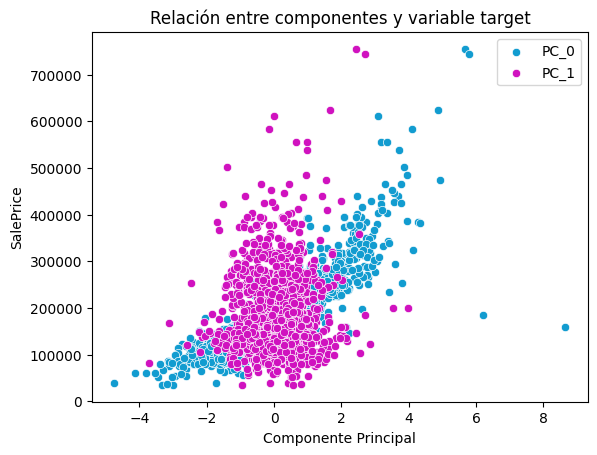

In [18]:
# Visualmente
df["PC_0"] = df_PCA_final_2["PC_0"]
df["PC_1"] = df_PCA_final_2["PC_1"]

plt.figure()
sns.scatterplot(
    data=df, x="PC_0", y="SalePrice", label="PC_0", color="#129CD0", alpha=1
)
sns.scatterplot(
    data=df, x="PC_1", y="SalePrice", label="PC_1", color="#D012BF", alpha=1
)
plt.xlabel("Componente Principal")
plt.ylabel("SalePrice")
plt.title("Relación entre componentes y variable target")

In [19]:
# Estimo coeficientes para modelo de regresión lineal con una sola variable origen de PCA:
model3 = "SalePrice ~ PC_0"
lm3 = sm.ols(formula=model3, data=df).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     3831.
Date:                Wed, 20 Sep 2023   Prob (F-statistic):               0.00
Time:                        21:42:47   Log-Likelihood:                -17603.
No. Observations:                1460   AIC:                         3.521e+04
Df Residuals:                    1458   BIC:                         3.522e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.809e+05   1091.976    165.682      0.0

In [20]:
coeficientes = lm3.params
print("Coeficientes:")
print(coeficientes)

Coeficientes:
Intercept    180921.195890
PC_0          46815.639063
dtype: float64


In [21]:
intervalo_confianza = lm3.conf_int()
print("Intervalo de confianza de los coeficientes:")
print(intervalo_confianza)

Intervalo de confianza de los coeficientes:
                       0              1
Intercept  178779.183235  183063.208546
PC_0        45331.966710   48299.311416


In [22]:
pvalores = lm3.pvalues
print("P-Valores:")
print(pvalores.round(6))

P-Valores:
Intercept    0.0
PC_0         0.0
dtype: float64


In [23]:
r_cuadrado = lm3.rsquared
print("Coeficiente de determinación (R-cuadrado):", r_cuadrado.round(3))

Coeficiente de determinación (R-cuadrado): 0.724


/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

Text(0.5, 1.0, 'Datos reales (Componentes Principales) vs Estimación')

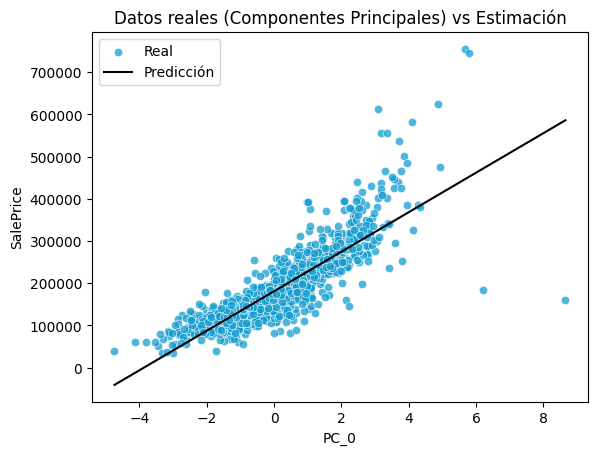

In [24]:
# Graficamente:
df["y_estimado"] = lm3.predict(df)
plt.figure()
sns.scatterplot(
    data=df, x="PC_0", y="SalePrice", label="Real", color="#129CD0", alpha=0.75
)
sns.lineplot(data=df, x="PC_0", y="y_estimado", label="Predicción", color="black")
plt.xlabel("PC_0")
plt.ylabel("SalePrice")
plt.title("Datos reales (Componentes Principales) vs Estimación")

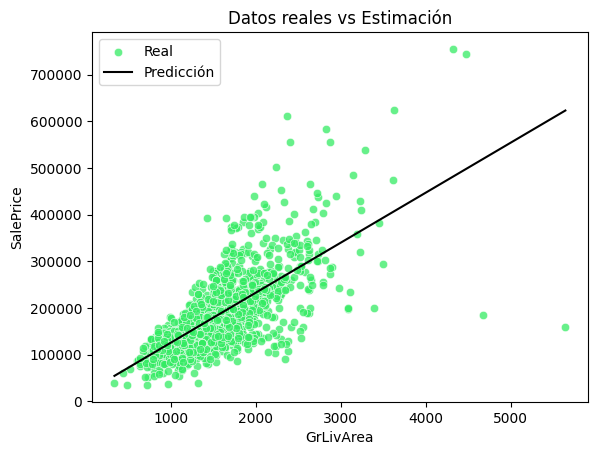

In [25]:
# Recordando el primer modelo:
g1